# Ejercicio de Numpy + Matplotlib: La regresión lineal

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Descargamos el archivo zip con urlretrieve:

In [4]:
from urllib.request import urlretrieve
datos, respuesta = urlretrieve("http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex2materials/ex2Data.zip")

In [5]:
print(respuesta)
print("")
print("Archivo descargado en: " + datos)

Date: Wed, 16 Mar 2022 07:40:15 GMT
Server: Apache/2.2.15 (CentOS)
Last-Modified: Tue, 28 Dec 2010 22:06:34 GMT
ETag: "726c14c8-351-4987faa672e80"
Accept-Ranges: bytes
Content-Length: 849
Connection: close
Content-Type: application/zip



Archivo descargado en: C:\Users\Noelia\AppData\Local\Temp\tmp_54itl6r


##### Descomprimimos el archivo:

In [6]:
import os

directorio_actual = os.path.abspath(os.curdir)

print("El directorio en el que está Python ahora mismo es " + directorio_actual)

El directorio en el que está Python ahora mismo es C:\Users\Noelia\MODULOII_PYTHON&MACHINE_LEARNING\MachineLearning


In [8]:
import zipfile

archivo_zip = open(datos, "rb")

archivo_zip_instanciado = zipfile.ZipFile(archivo_zip)
archivo_zip_instanciado.printdir()
archivo_zip_instanciado.extractall(directorio_actual)


File Name                                             Modified             Size
ex2x.dat                                       2010-10-14 10:57:02          850
ex2y.dat                                       2010-10-14 10:57:02          850


##### Cerramos los archivos leídos:

In [9]:
archivo_zip.close()

##### Unimos ambas rutas:

In [10]:
ruta_archivo_x = os.path.join(directorio_actual, "ex2x.dat")
ruta_archivo_y = os.path.join(directorio_actual, "ex2y.dat")
print(ruta_archivo_x)
print(ruta_archivo_y)

C:\Users\Noelia\MODULOII_PYTHON&MACHINE_LEARNING\MachineLearning\ex2x.dat
C:\Users\Noelia\MODULOII_PYTHON&MACHINE_LEARNING\MachineLearning\ex2y.dat


##### Utilizamos archivo.readlines() para que se cree una lista con cada línea del archivo como elemento de la misma:

In [12]:
archivo_x = open(ruta_archivo_x, "r")
x_leido = archivo_x.readlines()
archivo_x.close()

archivo_y = open(ruta_archivo_y, "r")
y_leido = archivo_y.readlines()
archivo_y.close()



### LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

 - Limpiar espacios y caracteres \n ; Utilizaremos el método .strip()
 - Convertirlos a floats

In [13]:
x = [float(elemento.strip()) for elemento in x_leido]
y = [float(elemento.strip()) for elemento in y_leido]

# Comprobamos:
print(x[:10])
print(y[:10])

[2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079, 2.7866882, 2.9116825, 3.035627, 3.1146696, 3.1582389]
[0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889, 0.9668474, 0.96436824, 0.91445939, 0.93933944, 0.96074971]


##### Borramos los archivos descomprimidos de nuestro ordenador:

In [14]:
os.remove(ruta_archivo_x)
os.remove(ruta_archivo_y)



### REGRESIÓN LINEAL CON NUMPY

#### 1º - Convertir las listas en arrays de Numpy:

In [16]:
array_x = np.array(x)
array_y = np.array(y)

print("Primeras líneas de cada array:")
print("x: \n" + str(array_x[:10]))
print("y: \n" + str(array_y[:10]))

Primeras líneas de cada array:
x: 
[2.0658746 2.3684087 2.5399929 2.5420804 2.549079  2.7866882 2.9116825
 3.035627  3.1146696 3.1582389]
y: 
[0.77918926 0.91596757 0.90538354 0.90566138 0.9389889  0.9668474
 0.96436824 0.91445939 0.93933944 0.96074971]


In [17]:
assert np.allclose(np.array([array_x.sum()]), np.array([246.17859859999999])), "Test fallido: array_x"
assert np.allclose(np.array([array_y.sum()]), np.array([53.234302730000003])), "Test fallido: array_y"
print("¡Correcto!")

¡Correcto!


##### Redimensionamos los arrays, para que dejen de ser de dimensiones (50, ) y pasen a ser de (50,1)

In [22]:
array_x_redimen = np.reshape(array_x,(50,1))
array_y_redimen = np.reshape(array_y,(50,1))

print("Primeras líneas de cada array:")
print("x: \n" + str(array_x_redimen[:10]))
print("y: \n" + str(array_y_redimen[:10]))

Primeras líneas de cada array:
x: 
[[2.0658746]
 [2.3684087]
 [2.5399929]
 [2.5420804]
 [2.549079 ]
 [2.7866882]
 [2.9116825]
 [3.035627 ]
 [3.1146696]
 [3.1582389]]
y: 
[[0.77918926]
 [0.91596757]
 [0.90538354]
 [0.90566138]
 [0.9389889 ]
 [0.9668474 ]
 [0.96436824]
 [0.91445939]
 [0.93933944]
 [0.96074971]]


In [24]:
assert array_x_redimen.shape == (50,1), "Error en las dimensiones de array_x_redimen"
assert array_y_redimen.shape == (50,1), "Error en las dimensiones de array_y_redimen"
print("¡Correcto!")

¡Correcto!


##### Concatenamos ambos arrays:

In [31]:
dataset = np.concatenate([array_x_redimen, array_y_redimen], axis = 1 )

print("Dataset (columna x, columna y):\n" + str(dataset[:10]))

Dataset (columna x, columna y):
[[2.0658746  0.77918926]
 [2.3684087  0.91596757]
 [2.5399929  0.90538354]
 [2.5420804  0.90566138]
 [2.549079   0.9389889 ]
 [2.7866882  0.9668474 ]
 [2.9116825  0.96436824]
 [3.035627   0.91445939]
 [3.1146696  0.93933944]
 [3.1582389  0.96074971]]


In [32]:
print(np.shape(dataset))

(50, 2)


In [33]:
assert dataset.shape == (50,2), "Error en las dimensiones de la matriz."
assert np.allclose(dataset.sum(axis=0), np.array([246.1785986, 53.23430273])), ("Test fallido: matriz. Comprueba que la primera columna es la de las x y la segunda la de las y")
print("¡Correcto!")

¡Correcto!


##### Hacemos un gráfico de dispersión con scatter():

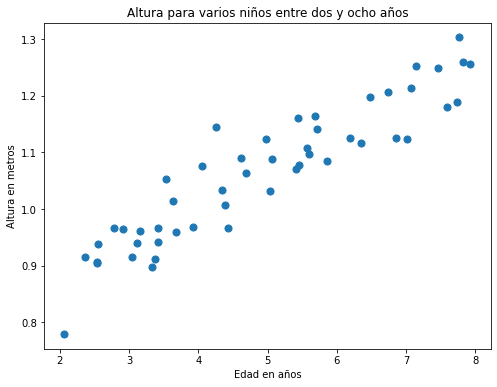

In [117]:
# Ejercicio04: rellenar con los datos de los ejes
# x e y a partir de nuestro dataset haciendo slicing.
# Así, podrás dibujar con plt.scatter:
plt.figure(figsize=(8,6))
plt.title("Altura para varios niños entre dos y ocho años")
plt.xlabel("Edad en años")
plt.ylabel("Altura en metros")

# Para más información sobre plt.scatter, consultar:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(array_x_redimen, array_y_redimen, s=50);

##### Vamos a realizar una regresión lineal para crear un modelo predictivo con el que intentemos predecir la altura de un niño, dada su edad.

Método de Mínimos Cuadrados Ordinarios (OLS) : la función de reducción (loss function) es convexa, de forma que la optimización de la misma se puede realizar de forma determinística y, en este caso, utilizando álgebra lineal.

Queremos obtener una función que nos permita explicar la y en función de la x, mediante la multiplicación de un parámetro 𝛽 que tenemos que estimar: 𝑦=𝛽⋅𝑋.

Este 𝛽 lo obtenemos a travé de 𝛽=(𝑋^𝑇𝑋)^−1𝑋^𝑇𝑦.



##### Reasignamos a la variable x la columna de las xs de nuestro dataset y la variable y a la columna de las ys:

In [61]:
X = dataset[:,0].reshape(50,1)
y = dataset[:,1].reshape(50,1)

print("X (primeras 10 observaciones):\n" + str(X[:10])+"\n")
print("y (primeras 10 observaciones):\n" + str(y[:10]))

X (primeras 10 observaciones):
[[2.0658746]
 [2.3684087]
 [2.5399929]
 [2.5420804]
 [2.549079 ]
 [2.7866882]
 [2.9116825]
 [3.035627 ]
 [3.1146696]
 [3.1582389]]

y (primeras 10 observaciones):
[[0.77918926]
 [0.91596757]
 [0.90538354]
 [0.90566138]
 [0.9389889 ]
 [0.9668474 ]
 [0.96436824]
 [0.91445939]
 [0.93933944]
 [0.96074971]]


In [69]:
# Ejercicio05: Realizar el cómputo de
# beta, a partir de la fórmula de la
# closed form solution para OLS,
# dados X e y:   𝛽=(𝑋^𝑇𝑋)^−1𝑋^𝑇𝑦

beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Beta:\n" + str(beta))

Beta:
[[0.19984032]]


In [70]:
assert np.allclose(beta, np.array([[0.19984032]])), "Error: valor inválido de beta"
print("Correcto!")

Correcto!


##### Ya podemos escribir nuestra Ho:

In [71]:
beta = beta[0,0]
print("Hipótesis:\n" + "y = " + str(beta) + " x")

Hipótesis:
y = 0.19984031989419992 x


##### Lo dibujamos:

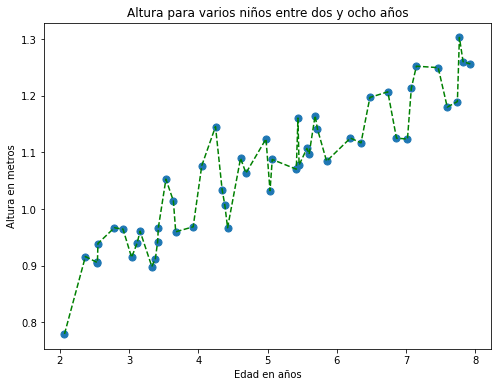

In [116]:
plt.figure(figsize=(8,6))
plt.title("Altura para varios niños entre dos y ocho años")
plt.xlabel("Edad en años")
plt.ylabel("Altura en metros")

# Primero el scatterplot (igual que el anterior,
# con los mismos datos en cada eje):
plt.scatter(array_x_redimen, array_y_redimen, s=50)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Y ahora la recta:
plt.plot(array_x_redimen, 
         array_y_redimen,
         "g--");

##### Añadimos el intercepto o sesgo , obteniendo una nueva fórmula de nuestra recta, ahora con ordenada en el origen  𝛽0 , lo cual nos va a ofrecer un mejor ajuste en nuestro modelo.

Siempre que nuestros datos no estén centrados (es decir, que no tengan media 0), se recomienda añadir intercept, para un mejor ajuste.
Tenemos que añadir una columna de unos a nuestro dataset, y realizar las mismas operaciones algebraicas para sacar nuestro, ahora, vector  𝛽 .

In [89]:
# Ejecutar para ver las primeras 10 observaciones de nuestra feature matrix X:
X[:10]

array([[2.0658746],
       [2.3684087],
       [2.5399929],
       [2.5420804],
       [2.549079 ],
       [2.7866882],
       [2.9116825],
       [3.035627 ],
       [3.1146696],
       [3.1582389]])

In [108]:
# Añadimos la columna de unos:
columna_unos = np.ones ((50,1), dtype=float)

X_con_intercept = np.append(columna_unos, X, axis =1)

print(X_con_intercept [:10])

[[1.        2.0658746]
 [1.        2.3684087]
 [1.        2.5399929]
 [1.        2.5420804]
 [1.        2.549079 ]
 [1.        2.7866882]
 [1.        2.9116825]
 [1.        3.035627 ]
 [1.        3.1146696]
 [1.        3.1582389]]


In [109]:
assert X_con_intercept.shape == (50,2), "Error: las dimensiones de X_con_intercept están mal. Debería ser una matriz 50 x 2"
assert np.allclose(X_con_intercept.sum(axis=0), np.array([50. , 246.1785986])), "Error: matriz X_con_intercept no válida. ¿Seguro que has añadido la columna de unos, y ésta es la primera de todas?"
print("Correcto!")

Correcto!


##### Volmemos a calcular : 𝛽=(𝑋^𝑇𝑋)^−1𝑋^𝑇𝑦

In [110]:
# Ejercicio08: calcular el nuevo vector beta,
# donde nuestra matriz X es la X_con_threshold
# que acabamos de hacer:

beta = np.linalg.inv(X_con_intercept.T @ X_con_intercept) @ X_con_intercept.T @ y

print("Vector beta:\n" + str(beta))

Vector beta:
[[0.75016254]
 [0.06388117]]


In [111]:
assert beta.shape == (2,1)
assert np.allclose(beta, np.array([[0.75016254],[0.06388117]]))
print("¡Correcto!")

¡Correcto!


Ya tenemos nuestra nueva estimación de parámetros del vector  𝛽 .


##### Por motivos de simplicidad, vamos a separar los dos valores del vector en beta_0 (threshold/bias) y beta_1 (parámetro que multiplica a la edad).


Si lo ponemos en nuestra ecuación de la recta:

In [112]:
beta_0 = beta[0,0]
beta_1 = beta[1,0]
print("Nuestra función ahora es:")
print("y = " + str(beta_1) + " x + " + str(beta_0))

Nuestra función ahora es:
y = 0.06388116582583406 x + 0.7501625370012388


Y este es nuestro nuevo modelo. Vamos a dibujar de nuevo el scatterplot, y la nueva recta:

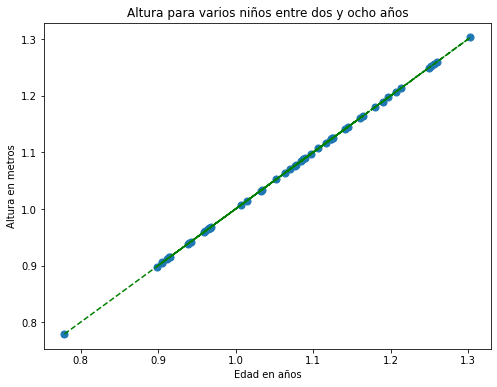

In [121]:
plt.figure(figsize=(8,6))
plt.title("Altura para varios niños entre dos y ocho años")
plt.xlabel("Edad en años")
plt.ylabel("Altura en metros")

# Como en los anteriores, primero el scatterplot:
plt.scatter(array_y_redimen, array_y_redimen, s=50)
beta = np.linalg.inv(X_con_intercept.T @ X_con_intercept) @ X_con_intercept.T @ y

# Y ahora la nueva recta
plt.plot(array_y_redimen, 
         array_y_redimen,
         "g--");